### Задание выполнила Колесниченко Ксения Сергеевна.

Контакты  https://www.linkedin.com/in/kseniia-kolesnichenko/

##### Задание: проверить статистические гипотезы о значимости признаков feature1 и feature2 (понять дают ли эти признаки какую-либо информацию для целевой переменной).


In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

### Изучение имеющихся данных, описательная статистика

In [2]:
data=pd.read_csv('test_Jan22.csv') #прочитаем и посмотрим файл
data=data[['target', 'feature1', 'feature2']] #оставим только те признаки, которые нужны в настоящем задании
data.head()

,target,feature1,feature2
0,NaN,1,1
1,NaN,0,0
2,NaN,0,0
3,1.0,1,1
4,NaN,1,0


In [3]:
#Посмотрим характеристики датафрейма, посмотрим, как много пустых 
print(data.info())
print(data.isnull().sum())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   target    2019 non-null   float64
 1   feature1  10000 non-null  int64  
 2   feature2  10000 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 234.5 KB
None
target      7981
feature1       0
feature2       0
dtype: int64
(10000, 3)


In [4]:
#Для удобства дальнейшей работы приведём оба target к тому же типу данных. 
data.target = data.target.astype("Int64")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   target    2019 non-null   Int64
 1   feature1  10000 non-null  int64
 2   feature2  10000 non-null  int64
dtypes: Int64(1), int64(2)
memory usage: 244.3 KB
None


Из предоставленного набора данных видно, что не в каждом случае заявка приводит ко взятию кредита. 
Вовсе необязательно причина в отказе. Клиент мог подавать заявки в несколько банков и взять кредит в том, где условия показались ему наилучшеми. Например, автор этого исследования, при взятии ипотеки подалась в три банка, получила одобрение во всех трёх, но взяла ипотеку только в одном. 

Поэтому в качестве датасета необходимо использовать только те данные, где есть информация о значении target. 

In [5]:
data=data[(data.target==0) | (data.target == 1)]
data.shape
data.head()

,target,feature1,feature2
3,1,1,1
6,1,0,0
7,1,1,0
10,0,1,0
24,0,1,1


1    1048
0     971
Name: target, dtype: Int64
<IntegerArray>
[1, 0]
Length: 2, dtype: Int64


<AxesSubplot:>

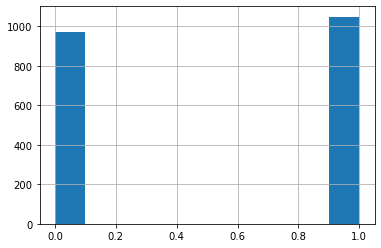

In [6]:
print(data['target'].value_counts())
print(data['target'].unique())
data.target.hist()

1    1239
0     780
Name: feature1, dtype: int64
[1 0]


<AxesSubplot:>

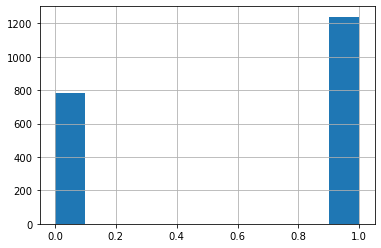

In [7]:
print(data['feature1'].value_counts())
print(data['feature1'].unique())
data.feature1.hist()

0    1028
1     991
Name: feature2, dtype: int64
[1 0]


<AxesSubplot:>

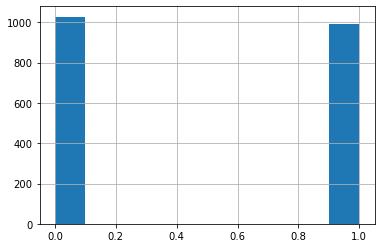

In [8]:
print(data['feature2'].value_counts())
print(data['feature2'].unique())
data.feature2.hist()

In [9]:
skew_a=(data['feature1'].skew())
kurt_a=(data['feature1'].kurt())
print('Асимметрия: {}\nЭксцесс:'.format(skew_a), (kurt_a))
data['feature1'].describe()

Асимметрия: -0.46725351079400235
Эксцесс: -1.7834417978136587


count    2019.000000
mean        0.613670
std         0.487028
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: feature1, dtype: float64

In [10]:
skew_b=(data['feature2'].skew())
kurt_b=(data['feature2'].kurt())
print('Асимметрия: {}\nЭксцесс:'.format(skew_b), (kurt_b))
data['feature2'].describe()

Асимметрия: 0.036685224547622096
Эксцесс: -2.0006369868205947


count    2019.000000
mean        0.490837
std         0.500040
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: feature2, dtype: float64

In [11]:
print(data.info())
print(data.isnull().sum())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2019 entries, 3 to 9997
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   target    2019 non-null   Int64
 1   feature1  2019 non-null   int64
 2   feature2  2019 non-null   int64
dtypes: Int64(1), int64(2)
memory usage: 65.1 KB
None
target      0
feature1    0
feature2    0
dtype: int64
(2019, 3)


In [12]:
skew_a=(data['target'].skew())
kurt_a=(data['target'].kurt())
print('Асимметрия: {}\nЭксцесс:'.format(skew_a), (kurt_a))
data['target'].describe()

Асимметрия: -0.07638767841754635
Эксцесс: -1.9961432636699745


count    2019.000000
mean        0.519069
std         0.499760
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [13]:
df=data
df.head()

,target,feature1,feature2
3,1,1,1
6,1,0,0
7,1,1,0
10,0,1,0
24,0,1,1


In [14]:
# Построим таблицу сопряжённости для первого признака. 
matrix_1=pd.crosstab(index=df['target'], columns=df['feature1'])
# Построим таблицу сопряжённости для второго признака. 
matrix_2=pd.crosstab(index=df['target'], columns=df['feature2'])
# Приведём таблицу к формату numpy
df_num1=matrix_1.to_numpy() 
df_num2=matrix_2.to_numpy() 

### Постановка гипотез

Выдвинем нулевую гипотезу Н0, согласно которой нет статистической связи между призаком feature1 и целевой переменной.
Выдвинем альтернативную гипотезу H1, согласно которой есть статистическая связь между признаком  feature1 и целевой переменной.



In [15]:
# Зададим таблицу 
data = df_num1
chi2, p, dof, expected = chi2_contingency(data)
# Задаим уровень значимости p-value
alpha = 0.05
print ( "p-value = " + str (p))
if p <= alpha:
    print ( 'Статистическая связь между переменными есть (отклоняем гипотезу H0)' )
else :
    print ( 'Статистическая связь между переменными отсутствует (принимаем гипотезу H0)' ) 
print(f"Хи-квадрат критерий={chi2:.5g}")

p-value = 3.5153185102706947e-65
Статистическая связь между переменными есть (отклоняем гипотезу H0)
Хи-квадрат критерий=290.69


Для числа степеней свободы 1 и уровне значимости 0,05 критическое значение хи-квадрат составляет 3,84, что значительно меньше полученного значения 290,69.

Значение P-value<0,05, можем смело отвергать гипотезу о неслучайности. Таким образом, показатель feature1 статистически значим. 

Выдвинем нулевую гипотезу Н0, согласно которой нет статистической связи между призаком feature2 и целевой переменной.
Выдвинем альтернативную гипотезу H1, согласно которой есть статистическая связь между признаком  feature2 и целевой переменной.

In [16]:
# Зададим таблицу 
data = df_num2
chi2, p, dof, expected = chi2_contingency(data)
# Задаим уровень значимости p-value
alpha = 0.05

print ( "p-value = " + str (p))
if p <= alpha:
    print ( 'Статистическая связь между переменными есть (отклоняем гипотезу H0)' )
else :
    print ( 'Статистическая связь между переменными отсутствует (принимаем гипотезу H0)' ) 
print(f"Хи-квадрат критерий= {chi2:.5g}")

p-value = 0.0762526276849399
Статистическая связь между переменными отсутствует (принимаем гипотезу H0)
Хи-квадрат критерий= 3.143


Для числа степеней свободы 1 и уровне значимости 0,05 критическое значение хи-квадрат составляет 3,84, что значительно меньше полученного значения 292,25. 
P-value>0,05, мы не можем отвергнуть гипотезу о неслучайности. 
Таким образом, показатель feature2 статистически незначим. Его необходимо исключить из анализа. 

Мы определили сам факт того, что feature1 статистически значим. Но какова мера тесноты связи, показывают коэффициннты ассоциации, контингенции, взаимной сопряжённости Пирсона и Чупрова. Для четырёхпольных таблиц обычно рекомендуют использовать только первые две. 

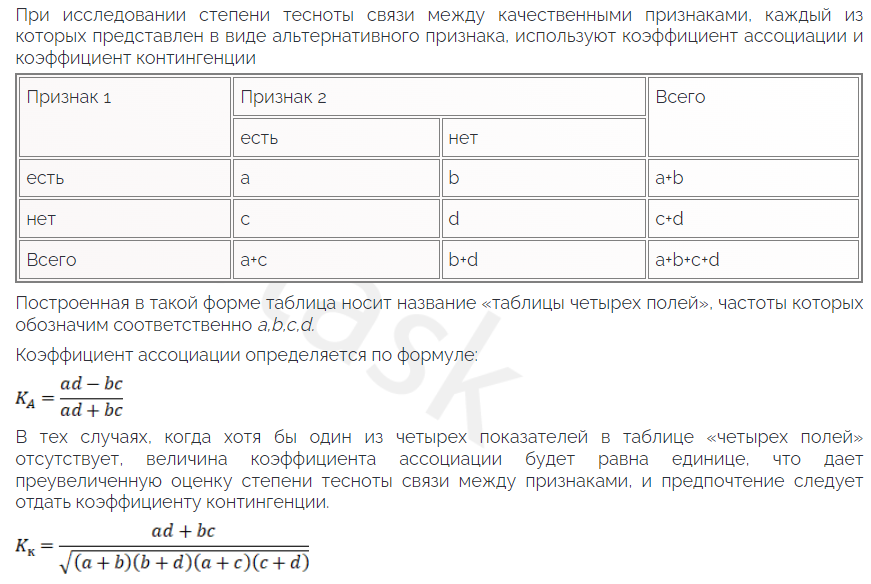

In [17]:
#Для удобства присвоим значения a, b, c, d
print(df_num1)
a=df_num1[0][0]
b=df_num1[0][1]
c=df_num1[1][0]
d=df_num1[1][1]
print(a, b, c, d)

[[562 409]
 [218 830]]
562 409 218 830


In [18]:
#Рассчитаем коэффициент ассоциации
Kas=(a*d-b*c)/(a*d+b*c)
#Рассчитаем коэффициент контингенции
Kcon=(a*d-b*c)/(((a+b)*(c+d)*(a+c)*(b+d))**(1/2))
print(Kas)
print(Kcon)

0.679055184999874
0.3804620049976465


Значения коэффициента ассоциации Kas>0.5 и коэффициента контингенции Kcon>0.3 говорят о наличии достаточно значительной и подтверждённой связи. В примере оба коэффициента характеризуют значительную прямую связь между исследуемыми признаками 

### Feature engineering

Сам по себе тот факт, что переменная качественная и бинарная, сильно ограничивает в возможностях создания переменных - так, даже возведение в квадрат не даст вообще ничего, так как и возведение в квадрат и нуля и единицы даёт единицу, а деление 0 или на 0 не даст смысла. Если попробовать перевести их в '-1' и '1', то возведение в квадрат приведёт к тому, что будет принят альтернативный признак, равно как и с отрицательными числами.

## Вывод

Признак feature1 статистически значим, имеется достаточно значительная подтверждённая связь с целевым признаком. 
Признак feature2 статистически незначим, подлежит исключению из анализа. Возможности создания новых переменных отсутствуют. 